# Parte 1. Web Scrapping


## 1.1 Creación de paraderos
Lo primero que hacemos es meternos a la página web de TriggerMilenio para sacar la información de las tablas que necesitamos. Esto lo hacemos leyendo el código fuente de la página en formato string. Esto se almacena en la variable "sourceCode".

In [0]:
import urllib.request as net
import socket
from urllib.request import URLError

class WebDownloader:
    
    def __init__(self, link):
        self.user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
        self.url =  link
        
        
    def getHtmlAsString(self):
        headers = {'User-Agent':self.user_agent}
        request= net.Request(self.url,None,headers)
        response = net.urlopen(request)
        #while True.  
          #try:
          #  response = net.urlopen(request)
          #break
          #except URLError:
          #  return None
          #except socket.timeout:
          #  return None
          

        return response.read().decode('utf-8')
    
wd = WebDownloader('https://iic2115.github.io/TyggerMilenio/')
sourceCode = wd.getHtmlAsString()


### Encuentra tablas
Esta función recibe como parámetro un string (sourceCode) y te retorna una lista con todos las tablas que contiene el codigo fuente de la página. 

**Importante:** Esta lista ya está "limpia", es decir, se eliminan aquellas tablas que contienen la clase "fake".

In [0]:
def encuentra_fake(codigo):
  i = 0
  encontrado = False
  while i + 4 < len(codigo):
    if codigo[i:i + 4] == "fake" or codigo[i: i+4] == "Fake":
      encontrado = True
    i += 1
  return encontrado

def encuentra_tablas(sourceCode):
  i = 0
  tablas = []
  while i + 28 <= len(sourceCode):
    if sourceCode[i:i+28] == '<div class="twelve columns">':
      j = i + 29
      string = str()
      while sourceCode[j:j+6] != '</div>':
        string += sourceCode[j]
        j += 1
      tablas.append(string)
    i += 1
  tablas_limpias = []
  for t in tablas:
    if not encuentra_fake(t):
      tablas_limpias.append(t)
  return tablas_limpias

### Encuentra próxima URL
Esta función también recibe como parámetro un string y te retorna la URL de la próxima página que hay que visitar. Para esto se usa la librería "beautiful soup 4" (ver clases).


In [0]:
import bs4
def proxima_URL(sourceCode):
  URL = str()
  soup = bs4.BeautifulSoup(sourceCode)
  for node in soup.findAll('a'):
      URL = node.get('href')[1::]
  return 'https://iic2115.github.io/TyggerMilenio' + URL


### From string to list
Esta función recibe como parámetro un string con el código fuente de la página y utiliza la función "encuentra_tablas" para encontrar todas las tablas del código. Luego, traspasa esta información a una lista de listas con el formato:

[paradero, n° de recorridos, [lista de buses]]

**Importante:** Además, esta función se preocupa de que solo se trabaje con cantidades pares de NServicios.


In [0]:
def from_str_to_list(sourceCode):
  tablas = encuentra_tablas(sourceCode)
  datos_totales = []
  for t in tablas:
    soup = bs4.BeautifulSoup(t)
    tablaX = []
    for node in soup.findAll('td'):
      tablaX.append(str(node)[4:-5])
    com_list = [tablaX[x:x+3] for x in range(0, len(tablaX), 3)]
    for i in com_list:
      paradero = i[0]
      n_recorridos = int(i[1])
      lista_buses = i[2].split(';')
      if n_recorridos % 2 == 0:
        datos_totales.append([paradero, n_recorridos, lista_buses])
  return datos_totales


    
  

### Guardar los datos:
Ahora que ya tenemos todas las funciones que necesitamos, podemos guardar los datos de todas las tablas (para cada página) en una lista maestra a la cual llamaremos "datos"

In [0]:
datos = []
wd = WebDownloader('https://iic2115.github.io/TyggerMilenio/')
sourceCode = wd.getHtmlAsString()

URL2 = proxima_URL(sourceCode)
wd = WebDownloader(URL2)
sourceCode2 = wd.getHtmlAsString()

URL3 = proxima_URL(sourceCode2)
wd = WebDownloader(URL3)
sourceCode3 = wd.getHtmlAsString()


for d in from_str_to_list(sourceCode):
  datos.append(d)

for d in from_str_to_list(sourceCode2):
  datos.append(d)


for d in from_str_to_list(sourceCode3):
  datos.append(d)



  

In [0]:
for i in datos:
  print(i)

['PI317', 6, ['111I', '113R', '113eR', '113cR', '350R', 'I11R']]
['PI307', 6, ['111I', '113R', '113eR', '113cR', '350R', 'I11R']]
['PI269', 6, ['111R', '113I', '113eI', '113cI', '350I', 'I11I']]
['PI309', 6, ['111I', '113R', '113eR', '113cR', '350R', 'I11R']]
['PI267', 6, ['111R', '113I', '113eI', '113cI', '350I', 'I11I']]
['PI308', 6, ['111I', '113R', '113eR', '113cR', '350R', 'I11R']]
['PI268', 6, ['111R', '113I', '113eI', '113cI', '350I', 'I11I']]
['PI311', 6, ['111I', '113R', '113eR', '113cR', '350R', 'I11R']]
['PI312', 6, ['111I', '113R', '113eR', '113cR', '350R', 'I11R']]
['PI1599', 8, ['111I', '111R', '113I', '113R', '113eI', '113eR', '113cI', '113cR']]
['PI313', 2, ['350R', 'I11R']]
['PI264', 2, ['350I', 'I11I']]
['PI265', 6, ['111R', '113I', '113eI', '113cI', '350I', 'I11I']]
['PI310', 6, ['111I', '113R', '113eR', '113cR', '350R', 'I11R']]
['PI266', 6, ['111R', '113I', '113eI', '113cI', '350I', 'I11I']]
['PI1094', 2, ['350I', 'I11I']]
['PI1100', 2, ['350R', 'I11R']]
['PI1093',

### Crear el archivo CSV
Una vez lista la lista data, guardamos estos datos en un archivo CSV.

In [0]:
import csv
import pandas as pd 

with open('paraderos.csv', mode='w') as paraderos_file:
    columnas = ['paradero', 'numero', 'servicio', 'sentido']
    p_writer = csv.writer(paraderos_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    p_writer.writerow(columnas)
    for line in datos:
      for bus in line[2]:
        direccion = bus[-1::]
        nombre = bus[0:-1]
        p_writer.writerow([line[0], line[1], nombre, direccion])
       
df_paraderos = pd.read_csv("paraderos.csv")

    

## Input del servicio a consultar
acá en base al input entregado a consultar, filtramos los paraderos pertenecientes al servicio

In [0]:
#consulta_ser=input("ingrese_servicio")
#PRUEBA
consulta_ser='210'





In [0]:
df_par_servicio = df_paraderos[df_paraderos.servicio == str(consulta_ser) ]


## 1.2 Obtención de datos para cada paradero del servicio

En base a los paraderos del servicio a consultar, se procede a extraer los datos desde la api.

In [0]:
import json 
import time
from pprint import pprint

with open('tiempo_estimado.csv', mode='w') as tiempos_file:
    columnas2 = ['hora', 'paradero', 'bus', 'patente','tiempo_de_demora','distancia_del_paradero']
    t_writer = csv.writer(tiempos_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    t_writer.writerow(columnas2)
    n_muestreos=3
    it=0
    while it<n_muestreos:
      for paradero in df_par_servicio.paradero:
        wd = WebDownloader('https://api.scltrans.it/v2/stops/' + paradero + '/next_arrivals')
        funciona = True
        while funciona:
          try:
            sourceCode = wd.getHtmlAsString()
            funciona = False
          except:
            time.sleep(0.5)
        dicc = json.loads(sourceCode)
        tiempo_ahora = time.time()
        print(paradero,tiempo_ahora)
        resultados = dicc['results']
        for r in resultados:
          lista_aux = [tiempo_ahora, paradero, r['route_id'], r['bus_plate_number'], r['arrival_estimation'], r['bus_distance']]
          t_writer.writerow(lista_aux)
      it+=1
      time.sleep(300)
      print(it)
      print("Nuevo Muestreo")
 



## se carga el csv como dataframe a pandas


In [0]:
df_t_est = pd.read_csv("tiempo_estimado.csv")
df_t_est['distancia_del_paradero'] = df_t_est['distancia_del_paradero'].fillna(-99)


# Parte 2. Visualización(Geopandas) 


In [0]:
!pip install geopandas
!pip install descartes
!pip install rtree
!apt install libspatialindex-dev

#!pip install libspatialindex
#https://github.com/libspatialindex/libspatialindex

    100% |████████████████████████████████| 901kB 15.7MB/s 
    100% |████████████████████████████████| 1.5MB 11.9MB/s 
    100% |████████████████████████████████| 17.8MB 1.6MB/s 
    100% |████████████████████████████████| 4.4MB 4.2MB/s 
    100% |████████████████████████████████| 81kB 21.7MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / -

 ### 2.1 Librerias necesarias pt2 :
 Importamos todas la librerias necesarias.


In [0]:
import pandas as pd
from shapely.geometry import LineString
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rtree


### 2 1 obtenemos los archivos shapes(stgo,paraderos,trazados) a utilizar:

se descargan archivos shp de la ciudad de Santiago, Obtenidos desde : [Biblioteca del Congreso Nacional](https://www.bcn.cl/siit/mapas_vectoriales)

In [0]:
!git clone https://github.com/iasantibanez/Archivos_L06
!git clone https://github.com/iasantibanez/shape_stgo2 


Cloning into 'Archivos_L06'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
Cloning into 'shape_stgo2'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 2), reused 19 (delta 1), pack-reused 0
Unpacking objects: 100% (27/27), done.


### Archivos Trazados y paraderos TS

In [0]:
shp_paraderos = gpd.read_file('./Archivos_L06/Shape Paraderos/', crs={'init': 'epsg:5361'})
shp_trazados = gpd.read_file('./Archivos_L06/TrazadosUTM/', crs={'init': 'epsg:5361'})

### Archivos mapa Santiago

se cargan los shapes cargados anteriormente.

In [0]:
stgo = gpd.read_file('./shape_stgo2/Distritos_censales', crs={'init': 'epsg:5361'})
areas_urbanas = gpd.read_file('./shape_stgo2/Areas urbanas', crs={'init': 'epsg:5361'})
metro = gpd.read_file('./shape_stgo2/Metro', crs={'init': 'epsg:5361'})


#stgo_urbano = gpd.sjoin(stgo, areas_urbanas[areas_urbanas.NOMBRE == 'Santiago'], op='intersects', lsuffix='geometry', rsuffix='geometry')

###EJEMPLO DE 1 RECORRIDO "210"
#rec = shp_trazados_utm[shp_trazados_utm.COD_USUARI == '210'].reset_index()

### filtrado de los paraderos del servicio en SHAPE

En base al servicio a consultar, se obtienen los paraderos asociados al servicio, y se guardan en un arreglo "b"

In [0]:

a = df_par_servicio['paradero'].tolist()

b = shp_paraderos[shp_paraderos['CODIGO'].isin(a)]





### Dibuja trazado

Aca graficamos los trazados (ROJO Y AZUL para ida y vuelta) y los paraderos (VERDE)

In [0]:
#Mapa con stgo, trazados, paraderos.

# Setup figure and axis
f, ax = plt.subplots(1,figsize=(18, 16))

def plot_map(rec,ax):
  # PLOT MAPA STGO (con poligonos)
  stgo.plot(ax=ax,figsize=(18,16), color='#EFEFEF', edgecolor='#444444')
  # PLOT LOS TRAZADOS (ida y vuelta)
  col=['red','blue']
  a=0
  for idx,group in rec.groupby('ROUTE_ID'):
    if (str(group['SENTIDO'])) == 'I':
      color=col[0]
    if (str(group['SENTIDO'])) == 'R':
      color=col[1]
    if a == 2 :
      a = 0
    group.plot(ax=ax, color=col[a])
    a+=1
  # PLOT LOS PARADEROS
  b.plot(ax=ax, color='green')

  # Zoom en base al tamaño del recorrido.
  minx, miny, maxx, maxy = rec.total_bounds
  ax.set_xlim(minx, maxx)
  ax.set_ylim(miny, maxy)

  

rec = shp_trazados[shp_trazados.COD_USUARI == str(consulta_ser)].reset_index()
plot_map(rec,ax)



plt.show()

## calculo de posicion de buses a sus paraderos

Para poder encontrar la posicion del bus, podriamos generar un buffer en el paradero de radio (distancia al paradero) y posteriormente intersectarlo con el trazado (linestring) del servicio. de esta forma nos entregarian dos puntos al menos que serian las posiciones "factibles" de los buses

In [0]:

#RECORRIDO
rec = shp_trazados[shp_trazados.COD_USUARI == str(consulta_ser)].reset_index()
#PARADEROS
info_buses = df_t_est[df_t_est['bus'] == str(consulta_ser)]

#busco el paradero mas cercano a cada patente.
patentes= [] 
newdf = pd.DataFrame()
aux=[]
for idx,group in info_buses.groupby('patente'):
  radio = group['distancia_del_paradero'].min()
  patentes.append(idx)
  bus_cercano = group[group['distancia_del_paradero'] == radio ]
  newdf = newdf.append(bus_cercano)
  
#---------------MATCH ENTRE PARADERO Y TRAZADO------

from shapely.ops import nearest_points
from shapely.geometry import MultiPoint


#FUNCION QUE SIRVE PA CALCULAR EL MINIMO PUNTO EN PTS(QUE ES LINESTRING-RECTA TRANSFORMADA) DESDE UN Point.
def near(point, pts):
     # find the nearest point and return the corresponding Place value
    minimo=nearest_points(point, pts)[1]
    return minimo #RETORNA EL PTO DEL LINESTRING
    


#pto_min = near(ax,pts_linestring) 

def auxiliar(paradero):  #  A PARTIR DE UN PARADERO TE RETORNA EL PTO DEL LINESTRING(RECORRIDO) QUE ESTA MAS CERCA. (PRUEBA IDA Y VUELTA)
  rec_ida = rec[rec['SENTIDO'] == 'I']
  rec_vuelta= rec[rec['SENTIDO'] == 'R']
  linea1=rec_ida.geometry.unary_union
  linea2=rec_vuelta.geometry.unary_union
  punto_paradero=paradero.geometry.unary_union
  punto_en_trazado= near(punto_paradero,linea1)
  punto_en_trazado2= near(punto_paradero,linea2)
  dist1=punto_paradero.distance(punto_en_trazado)
  dist2=punto_paradero.distance(punto_en_trazado2)
  if dist1<dist2: #ELIJE EL PUNTO QUE ESTA MAS CERCANO AL TRAZADO ES DECIR EL LINE STRING QUE CALZA
    punto_final=punto_en_trazado
    sentido="I"
  else:
    punto_final=punto_en_trazado2
    sentido="R"
  return punto_final,sentido


def dist_acumulada(puntos,dist):
  dist_acumulada=0
  for j in puntos:
    print(j)
    
    
#AHORA RECORRO TODOS LOS PARADEROS DE CADA MICRO
for j in newdf.iterrows():
  par=j[1]['paradero']
  pto_paradero = shp_paraderos[shp_paraderos['CODIGO'] == str(par)] 
  minimo,sentido=auxiliar(pto_paradero)
  #printea el punto a recorrer, y el sentido del trazado a ocupar
  #print(minimo,sentido)
  #transformo trazado a pts para calcular las rectas
  rec_correcto = rec[rec['SENTIDO'] == str(sentido)]
  puntos = rec_correcto.geometry.unary_union
  
  # ACA LA IDEA ES IR RECORRIENDO LOS PUNTOS HASTA QUE SE CUMPLA LA DISTANCIA ACUMULADA, DESPUES DE ESO ESTA VENDRIA SIENDO LA POSICION DEL BUS.
  #for j in puntos.coords:

    #print(j)
    
  #print(puntos.coords)
  
  
  #:_________________HASTA ACA________-
  


 









In [0]:
from datetime import datetime
#tiempo de buses segun el servicio consultado
info_buses = df_t_est[df_t_est['bus'] == str(consulta_ser)]

#recorrido del servicio consultado
rec = shp_trazados[shp_trazados.COD_USUARI == str(consulta_ser)].reset_index()
#print(rec) 

info_buses = info_buses.set_index('patente')
patentes= [] 
newdf = pd.DataFrame()
aux=[]
for idx,group in info_buses.groupby('patente'):
  #print(group)
  #print(idx)
  #for t in group.iterrows():
  #  ts=t[1].hora
    #print(t[1].hora)
    #print(t[0])
    #print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
  b = group['distancia_del_paradero'].min()
  patentes.append(idx)
  bus_cercano = group[group['distancia_del_paradero'] == b ]
  #print(bus_cercano)
  newdf = newdf.append(bus_cercano)
 

#newdf.loc['CJRS-59']



/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


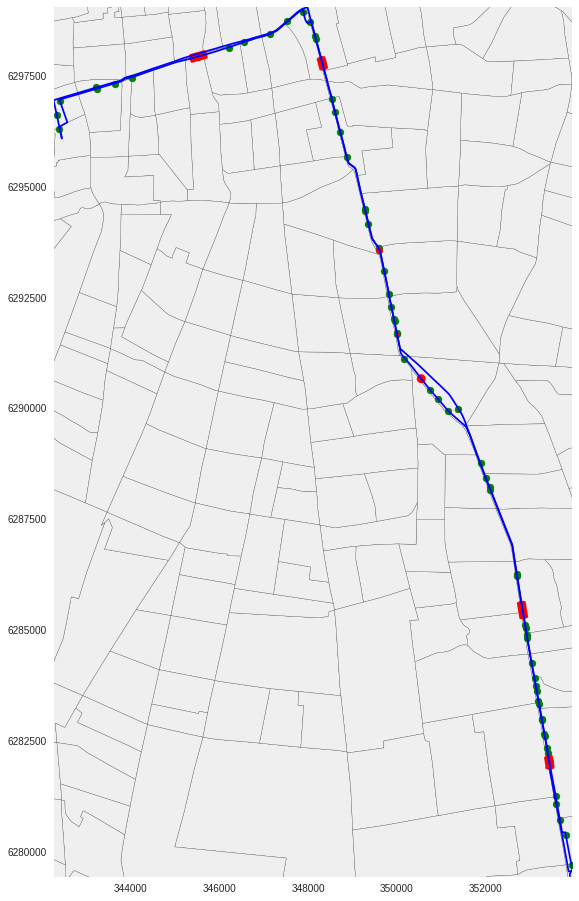

In [0]:
 
##INTERSECTAR RADIO:mdelparadero centro=paradero, contra linea trazado


#newgeodf = gpd.DataFrame()


a = df_par_servicio['paradero'].tolist()

b = shp_paraderos[shp_paraderos['CODIGO'].isin(a)]

paraderosbuffer = gpd.GeoDataFrame()
asd=[]

for idx in patentes:
  patente_bus = idx
  radio = float(newdf.loc[idx]['distancia_del_paradero']) / 2
  paradero = newdf.loc[idx]['paradero']

  #paradero-bus (buffer desde el punto del paradero con radio de distancia del bus
  
  pto_paradero = shp_paraderos[shp_paraderos['CODIGO'] == paradero ]
  pto_paradero.geometry = pto_paradero.buffer(radio,resolution=16)
  paraderosbuffer = paraderosbuffer.append(pto_paradero)  

# ACA YA PLOTEO, PARADEROS,TRAZADO y "BUS"
rec_correcto =  rec[rec['SENTIDO'] == str(sentido)]
rec_correcto['geometry'] = rec_correcto.buffer(100) # este es auxiliar para transformar las lineas del trazado a poligonos(DETERMINA EL ANCHO DE LAS LINEAS RES)
#GRAFICO INICIAL_BASE
f, ax = plt.subplots(1,figsize=(18, 16))
#GRAFICO STGO
stgo.plot(ax=ax,figsize=(18,16), color='#EFEFEF', edgecolor='#444444')
#GRAFICO RECORRIDO
rec.plot(ax=ax,color='blue')
#GRAFICO PARADEROS
b.plot(ax=ax,color='green')
## RES ES LA INTERSECCION RESULTANTE
res = gpd.overlay(rec_correcto,paraderosbuffer,how='intersection')
res.plot(ax=ax,color='red')
minx, miny, maxx, maxy = rec.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
plt.show()

#

 



# Parte 3. Consultas
Toda la documentación y supuestos de esta parte se encuentra en el readme.md adjunto

## 3.1 Avance total

In [0]:
def avance_total(bus):
  tiempos_df = pd.read_csv('tiempo_estimado.csv')
  df_bus = tiempos_df[tiempos_df['patente'] == bus]
  if len(df_bus) < 1:
    return -1
  else:
    paraderos = set(df_bus['paradero'].tolist())
    av = []
    for p in paraderos:
      ds = df_bus[df_bus['paradero'] == p]['distancia_del_paradero'].tolist()
      if len(ds) > 1:
        avance = ds[0] - ds[-1]
        av.append(avance)      
    if len(av) >= 1:
      return sum(av)/len(av)
    else:
      return "Este bus no cuenta con sufiencietes observaciones como para determinar su desplazamiento"

## 3.2 Buses llegando a paradero

In [0]:
def buses_llegando_a_paradero(paradero, n):
  tiempos_df = pd.read_csv('tiempo_estimado.csv')
  paradero_df = tiempos_df[tiempos_df['paradero'] == paradero]
  return paradero_df[paradero_df['distancia_del_paradero'] <= n]

## 3.3 Distancia entre buses